In [22]:
#import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [25]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [26]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [27]:
#Import request
import requests
#Import weather API Key.
from config import weather_api_key

In [28]:
#Starting URL for Weather map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [29]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [30]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
#Loop through all the cities in the list.
for i, city in enumerate(cities):
    #Group cities in sets of 50 for logging purposes.
    if (i %50==0 and i>=50):
        set_count +=1
        record_count = 1
    #Create endpoint URL with each city.
    city_url = url+ "&q=" + city.replace(" ","+")
        # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cairns
Processing Record 2 of Set 1 | altoona
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | chimbote
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | najran
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | palmas bellas
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | muzambinho
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | meulaboh
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | alofi
Processing Record 21 of Set 1 | casino
Processing Record 22 of Set 1 | bushehr
Processing Record 23 of Set 1 | izberbash
Processing Record

Processing Record 37 of Set 4 | carupano
Processing Record 38 of Set 4 | zaragoza
Processing Record 39 of Set 4 | rudnogorsk
Processing Record 40 of Set 4 | mazyr
Processing Record 41 of Set 4 | notre-dame-du-lac
Processing Record 42 of Set 4 | bantogon
Processing Record 43 of Set 4 | wulanhaote
City not found. Skipping...
Processing Record 44 of Set 4 | norman wells
Processing Record 45 of Set 4 | gboko
Processing Record 46 of Set 4 | manati
Processing Record 47 of Set 4 | kortkeros
Processing Record 48 of Set 4 | cururupu
Processing Record 49 of Set 4 | sitka
Processing Record 50 of Set 4 | goderich
Processing Record 1 of Set 5 | padang
Processing Record 2 of Set 5 | havre-saint-pierre
Processing Record 3 of Set 5 | katsuura
Processing Record 4 of Set 5 | ayr
Processing Record 5 of Set 5 | naze
Processing Record 6 of Set 5 | maracaibo
Processing Record 7 of Set 5 | saint-philippe
Processing Record 8 of Set 5 | amderma
City not found. Skipping...
Processing Record 9 of Set 5 | gitaram

Processing Record 27 of Set 8 | olinda
Processing Record 28 of Set 8 | ibra
Processing Record 29 of Set 8 | xai-xai
Processing Record 30 of Set 8 | port lincoln
Processing Record 31 of Set 8 | yar-sale
Processing Record 32 of Set 8 | xinyang
Processing Record 33 of Set 8 | mana
Processing Record 34 of Set 8 | henties bay
Processing Record 35 of Set 8 | pontianak
Processing Record 36 of Set 8 | santiago
Processing Record 37 of Set 8 | olafsvik
Processing Record 38 of Set 8 | bosilegrad
Processing Record 39 of Set 8 | mayumba
Processing Record 40 of Set 8 | moron
Processing Record 41 of Set 8 | ereymentau
Processing Record 42 of Set 8 | kijini
Processing Record 43 of Set 8 | sorland
Processing Record 44 of Set 8 | ngunguru
Processing Record 45 of Set 8 | pacific grove
Processing Record 46 of Set 8 | itarema
Processing Record 47 of Set 8 | anadyr
Processing Record 48 of Set 8 | elizabeth city
Processing Record 49 of Set 8 | richards bay
Processing Record 50 of Set 8 | seymchan
Processing 

City not found. Skipping...
Processing Record 16 of Set 12 | freeport
Processing Record 17 of Set 12 | marystown
Processing Record 18 of Set 12 | tabou
Processing Record 19 of Set 12 | ostrovnoy
Processing Record 20 of Set 12 | moiyabana
City not found. Skipping...
Processing Record 21 of Set 12 | upington
Processing Record 22 of Set 12 | sucua
Processing Record 23 of Set 12 | aberystwyth
Processing Record 24 of Set 12 | sandur
Processing Record 25 of Set 12 | aswan
Processing Record 26 of Set 12 | george
Processing Record 27 of Set 12 | satipo
Processing Record 28 of Set 12 | bud
Processing Record 29 of Set 12 | sechura
Processing Record 30 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 31 of Set 12 | denpasar
Processing Record 32 of Set 12 | korla
Processing Record 33 of Set 12 | sur
Processing Record 34 of Set 12 | nevelsk
Processing Record 35 of Set 12 | nachalovo
Processing Record 36 of Set 12 | negara
Processing Record 37 of Set 12 | oksovskiy
Processing Recor

In [31]:
len(city_data)

557

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cairns,-16.9167,145.7667,87.80,70,40,9.22,AU,2021-04-07 03:35:24
1,Altoona,40.5187,-78.3947,59.00,64,100,2.62,US,2021-04-07 03:35:25
2,Bluff,-46.6000,168.3333,59.00,78,61,13.00,NZ,2021-04-07 03:35:25
3,Qaanaaq,77.4840,-69.3632,1.81,74,99,5.10,GL,2021-04-07 03:31:07
4,Punta Arenas,-53.1500,-70.9167,46.40,93,90,11.50,CL,2021-04-07 03:31:10
5,Rikitea,-23.1203,-134.9692,77.13,67,19,11.90,PF,2021-04-07 03:35:26
6,Albany,42.6001,-73.9662,48.99,63,81,3.38,US,2021-04-07 03:35:26
7,Chimbote,-9.0853,-78.5783,69.17,87,96,6.15,PE,2021-04-07 03:35:27
8,Cape Town,-33.9258,18.4232,62.01,88,0,8.05,ZA,2021-04-07 03:32:04
9,Mataura,-46.1927,168.8643,59.00,78,76,13.00,NZ,2021-04-07 03:35:27


In [33]:
new_column_order= ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [34]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cairns,AU,2021-04-07 03:35:24,-16.9167,145.7667,87.80,70,40,9.22
1,Altoona,US,2021-04-07 03:35:25,40.5187,-78.3947,59.00,64,100,2.62
2,Bluff,NZ,2021-04-07 03:35:25,-46.6000,168.3333,59.00,78,61,13.00
3,Qaanaaq,GL,2021-04-07 03:31:07,77.4840,-69.3632,1.81,74,99,5.10
4,Punta Arenas,CL,2021-04-07 03:31:10,-53.1500,-70.9167,46.40,93,90,11.50
...,...,...,...,...,...,...,...,...,...
552,Shiyan,CN,2021-04-07 03:38:29,32.6475,110.7781,53.92,93,100,0.85
553,Plouzane,FR,2021-04-07 03:38:30,48.3833,-4.6167,37.40,65,20,5.75
554,Turukhansk,RU,2021-04-07 03:38:30,65.8167,87.9833,31.75,99,100,8.10
555,Kautokeino,NO,2021-04-07 03:38:31,69.0125,23.0412,14.04,86,95,4.81


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

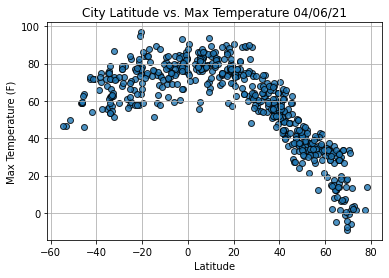

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

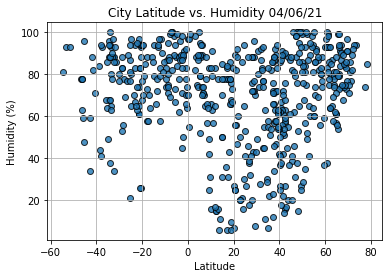

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

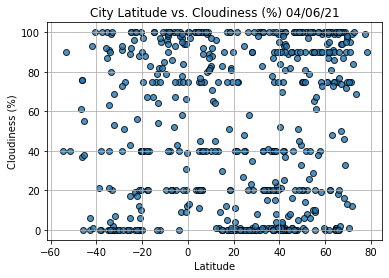

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

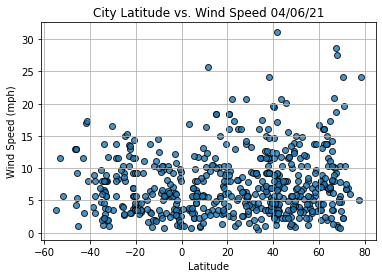

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()